<a href="https://colab.research.google.com/github/ishwarraja/SOAI-ERAV2/blob/main/S8/BN/S8_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch.nn.functional as F
from torchvision import datasets, transforms
import urllib3
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [3]:
# Hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 5

In [4]:
# Data augmentation and normalization
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
# Load CIFAR10 dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:02<00:00, 71600816.17it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:


!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:

from model import Net, model_summary, model_train, model_test


In [8]:
from tqdm import tqdm

In [9]:

# Create an instance of the network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# criterion = F.nll_loss
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [10]:


num_epochs = 15
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train(model, device, train_loader, optimizer, criterion)
  model_test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


Train: Loss=1.1160 Batch_id=390 Accuracy=46.96: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s]


Test set: Average loss: 1.0000, Accuracy: 28261/50000 (56.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


Train: Loss=0.9451 Batch_id=390 Accuracy=63.73: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s]


Test set: Average loss: 1.0000, Accuracy: 33410/50000 (66.82%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=0.9648 Batch_id=390 Accuracy=69.47: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]


Test set: Average loss: 1.0000, Accuracy: 35461/50000 (70.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.5726 Batch_id=390 Accuracy=72.90: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]


Test set: Average loss: 1.0000, Accuracy: 36828/50000 (73.66%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=0.5884 Batch_id=390 Accuracy=75.54: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]


Test set: Average loss: 1.0000, Accuracy: 38581/50000 (77.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.6332 Batch_id=390 Accuracy=77.02: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]


Test set: Average loss: 1.0000, Accuracy: 39012/50000 (78.02%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.8629 Batch_id=390 Accuracy=78.38: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]


Test set: Average loss: 1.0000, Accuracy: 39827/50000 (79.65%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.5987 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]


Test set: Average loss: 1.0000, Accuracy: 39822/50000 (79.64%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.5928 Batch_id=390 Accuracy=80.21: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]


Test set: Average loss: 1.0000, Accuracy: 40860/50000 (81.72%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.5719 Batch_id=390 Accuracy=81.33: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]


Test set: Average loss: 1.0000, Accuracy: 41108/50000 (82.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.6534 Batch_id=390 Accuracy=81.38: 100%|██████████| 391/391 [00:32<00:00, 12.02it/s]


Test set: Average loss: 1.0000, Accuracy: 40907/50000 (81.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.4428 Batch_id=390 Accuracy=81.96: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]


Test set: Average loss: 1.0000, Accuracy: 41246/50000 (82.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.5316 Batch_id=390 Accuracy=82.46: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]


Test set: Average loss: 1.0000, Accuracy: 41597/50000 (83.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.4667 Batch_id=390 Accuracy=83.04: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]


Test set: Average loss: 1.0000, Accuracy: 42266/50000 (84.53%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.3782 Batch_id=390 Accuracy=83.32: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]


Test set: Average loss: 1.0000, Accuracy: 42042/50000 (84.08%)

Adjusting learning rate of group 0 to 1.0000e-04.


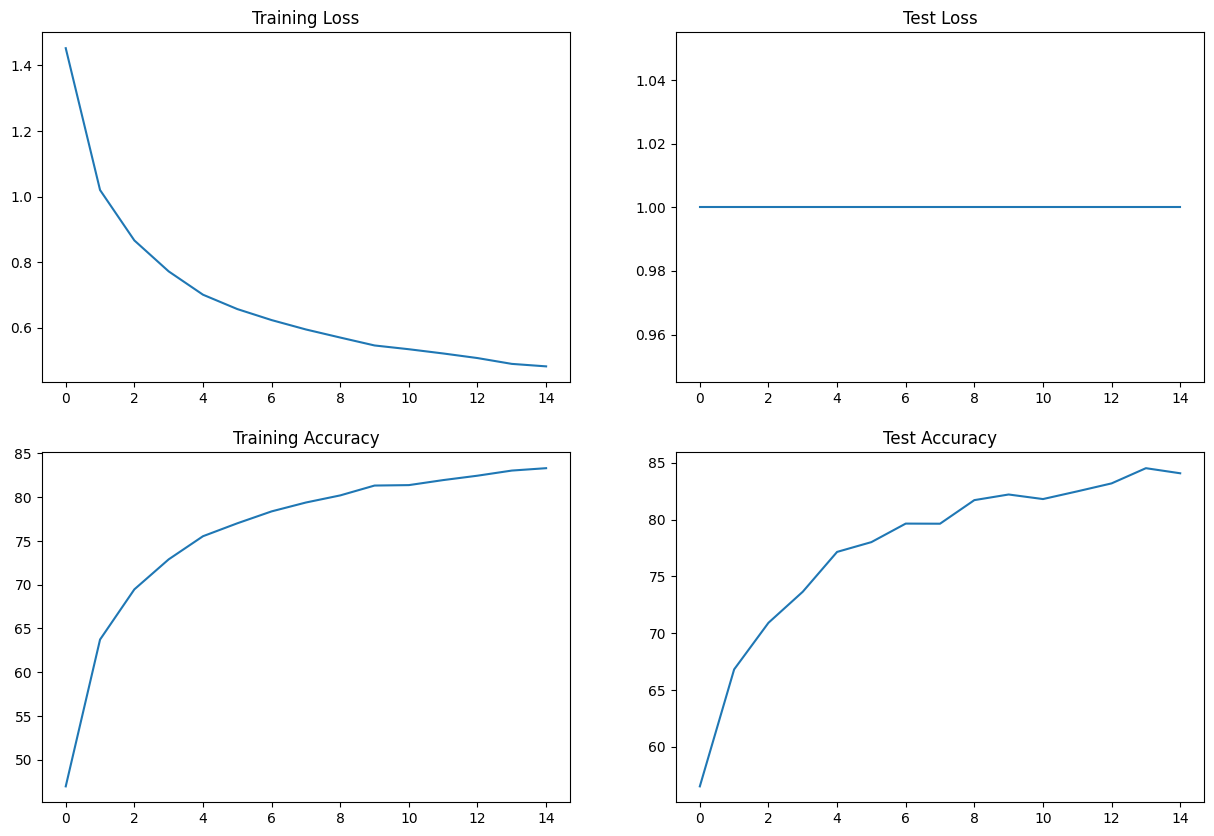

In [11]:
from model import draw_graphs

draw_graphs()

In [12]:

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             448
              ReLU-2           [-1, 16, 28, 28]               0
       BatchNorm2d-3           [-1, 16, 28, 28]              32
            Conv2d-4           [-1, 16, 28, 28]           2,320
              ReLU-5           [-1, 16, 28, 28]               0
       BatchNorm2d-6           [-1, 16, 28, 28]              32
            Conv2d-7           [-1, 32, 28, 28]           4,640
              ReLU-8           [-1, 32, 28, 28]               0
       BatchNorm2d-9           [-1, 32, 28, 28]              64
        MaxPool2d-10           [-1, 32, 14, 14]               0
           Conv2d-11           [-1, 32, 14, 14]           9,248
             ReLU-12           [-1, 32, 14, 14]               0
      BatchNorm2d-13           [-1, 32, 14, 14]              64
           Conv2d-14           [-1, 32,

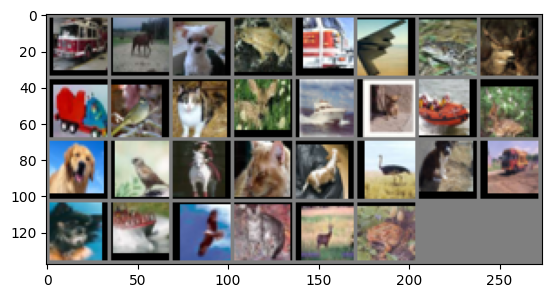

truck horse dog   frog  truck plane frog  deer  truck bird  cat   deer  ship  dog   ship  deer  dog   bird  horse cat   dog   bird  dog   truck dog   ship  bird  cat   deer  frog 


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5 #Unnormalizes the image by reversing the normalization process, assuming it was originally normalized using img = (img - mean) / std. This step is necessary to properly visualize the image.
    npimg = img.numpy()  #Converts the image tensor to a numpy array for compatibility with matplotlib.
    plt.imshow(np.transpose(npimg, (1,2, 0))) #Transposes the dimensions of the numpy array to match the expected shape of an image (H x W x C) and displays it using imshow from matplotlib.
    plt.show() #Displays the image plot.


# get some random training images
dataiter = iter(train_loader) #Creates an iterator from the training data loader.
images, labels = next(dataiter) #Retrieves a batch of images and their corresponding labels from the iterator.
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck',) #Defines the class labels for the CIFAR10 dataset.

import torchvision
# show images
imshow(torchvision.utils.make_grid(images[:30])) #Calls the imshow function to display a grid of the first 30 images in the batch.
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(30))) #Prints the corresponding labels for the displayed images.